# SEABORN TUTORIAL
Seaborn is a library for making statistical graphics in Python. 

## loading dataset

#### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
# current version generates warnings that we can ignore
warnings.filterwarnings("ignore")

#### loading built in dataset

Iris dataset has 50 samples from each of three species of Iris flower (Setosa, Virginica and Versicolor). Four features were measured (in centimetres) from each sample: Length and Width of the Sepals and Petals`

In [3]:
iris=sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### creating a swarm plot

A swarm plot is a type of scatter plot that is used for representing categorical values

In [7]:
sns.set() #loads default settings of seaborn plot
%matplotlib inline

<Axes: xlabel='species', ylabel='petal_length'>

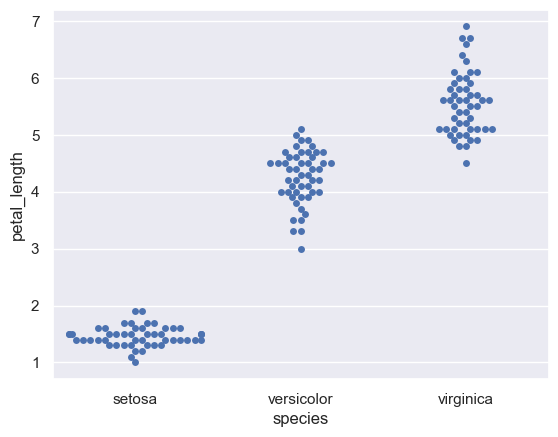

In [8]:
sns.swarmplot(x="species", y="petal_length", data=iris)

## controlling aesthetics
* One of the biggest advantages of Seaborn over Matplotlib is that its default aesthetics are visually far more appealing.
* Seaborn splits Matplotlib parameters into two independent groups: 
    * Styling- sets the aesthetic style of the plot
    * Scaling- scales various elements of the figure to get easily incorporated into different contexts

In [9]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: xlabel='day', ylabel='total_bill'>

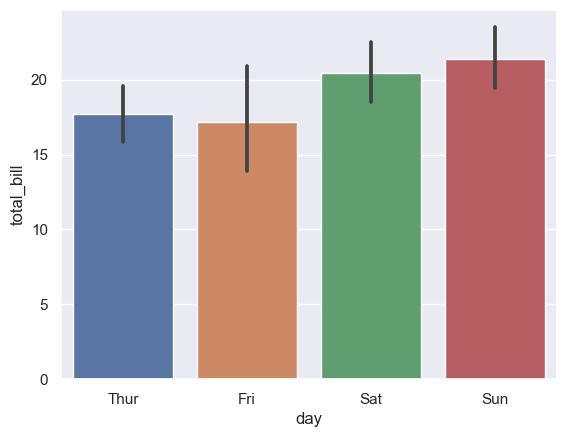

In [10]:
sns.set()
sns.barplot(x = "day", y = "total_bill", data = tips)

#### Styling

<Axes: xlabel='day', ylabel='total_bill'>

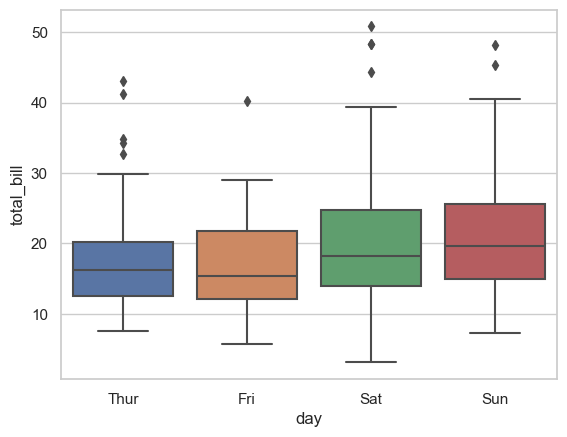

In [11]:
sns.set_style("whitegrid")
sns.boxplot(x = "day", y = "total_bill", data = tips)

<Axes: xlabel='day', ylabel='total_bill'>

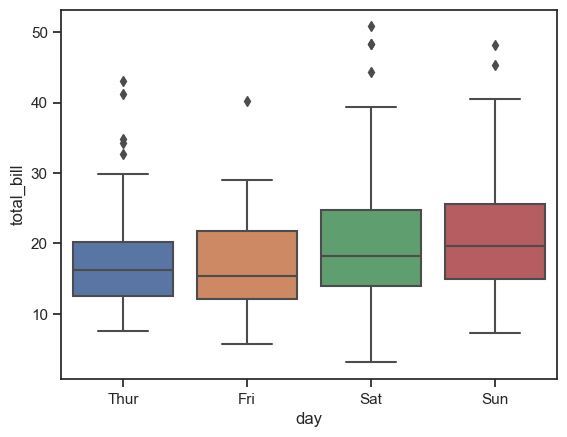

In [12]:
# another style
sns.set_style("ticks")
sns.boxplot(x="day", y="total_bill", data=tips)

removing top and right axis

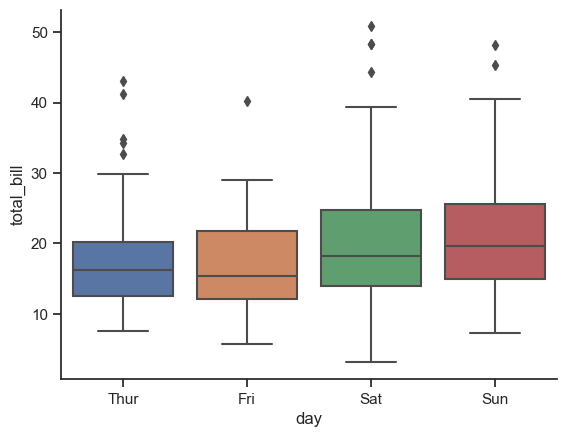

In [13]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.despine()
# to remove left axis sns.despine(left=True)

#### visualise 2 types of background in same plot

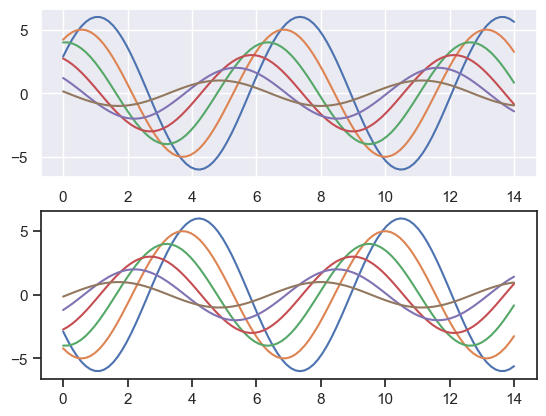

In [14]:
# This function will help us plot some offset sine waves:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212) # this is ticks style
sinplot(-1)

#### Scaling

In [15]:
sns.set()

<Axes: xlabel='day', ylabel='total_bill'>

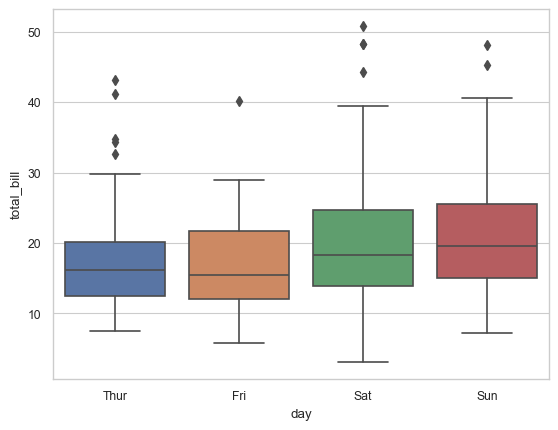

In [16]:
sns.set_context("paper")
sns.set_style("whitegrid")
sns.boxplot(x = "day", y = "total_bill", data = tips)

Jupyter Notebook scales down large images in the notebook cell output. This is generally done because past a certain size, we get automatic figure scaling.

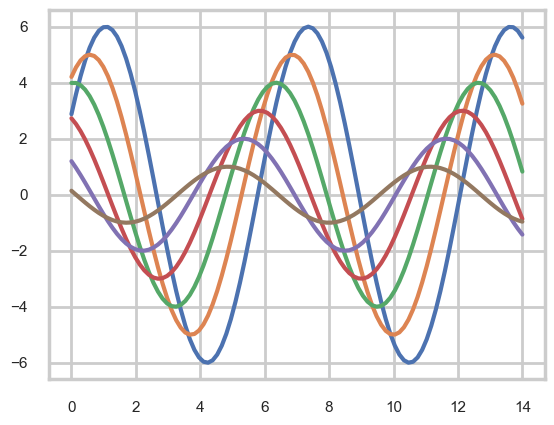

In [17]:
sns.set(style='whitegrid', rc={"grid.linewidth": 1.5}) # rc is used for finer control over aesthetics
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 3.0})
sinplot()

### histogram

<Axes: ylabel='Count'>

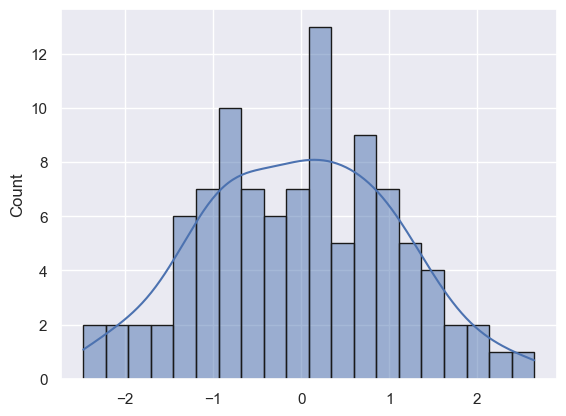

In [18]:
sns.set()
x = np.random.normal(size=100)
sns.histplot(x,bins=20,kde=True,edgecolor='k')

<Axes: ylabel='Density'>

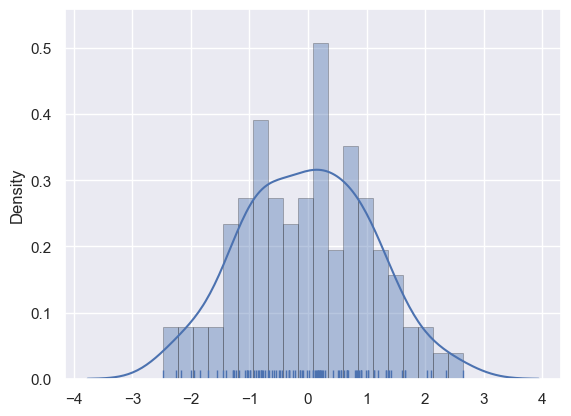

In [19]:
sns.distplot(x, bins=20, kde=True, rug=True, hist_kws=dict(edgecolor='k', linewidth=0.5))

changing axis limit

<Axes: xlabel='age', ylabel='Count'>

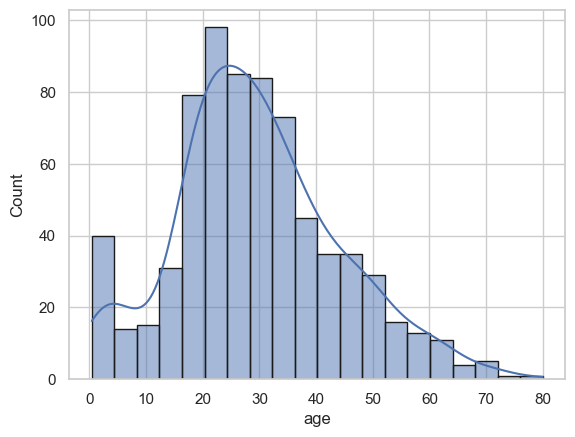

In [20]:
# loading dataset
titanic=sns.load_dataset('titanic')

# creating distribution plot
sns.set_style('whitegrid')
sns.histplot(titanic.age.dropna(),kde=True,edgecolor='k')

to plot graph with x axis starting at 0

<Axes: xlabel='age', ylabel='Count'>

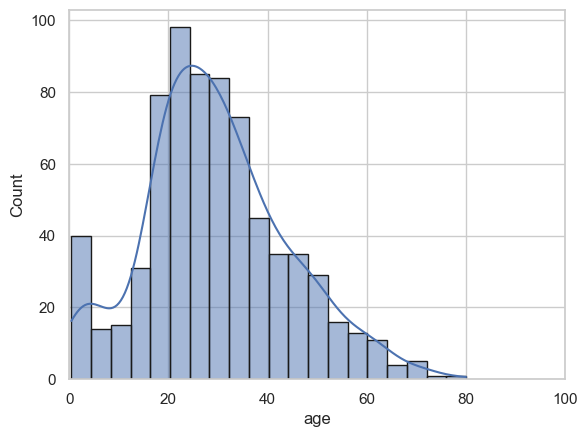

In [21]:
plt.xlim([0,100])
sns.histplot(titanic.age.dropna(),kde=True,edgecolor='k')

### linear regression plot
* linear regression computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

<Axes: xlabel='total_bill', ylabel='tip'>

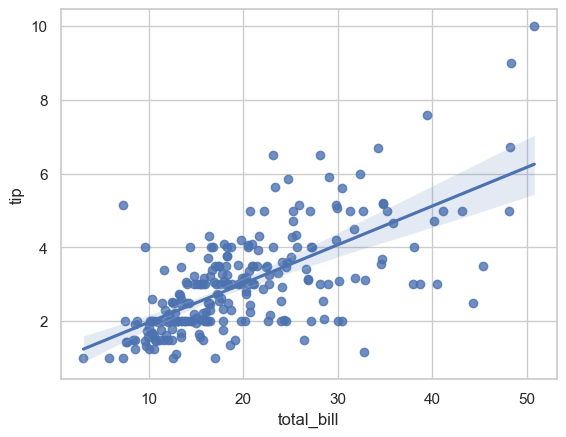

In [22]:
# loading dataset
tips=sns.load_dataset('tips')
sns.regplot(x='total_bill',y='tip',data=tips,color='b')

### Pair plot
* A pair plot is a grid of scatter plots where each variable is plotted against every other variable. The diagonal of this grid contains histograms of the individual variables.

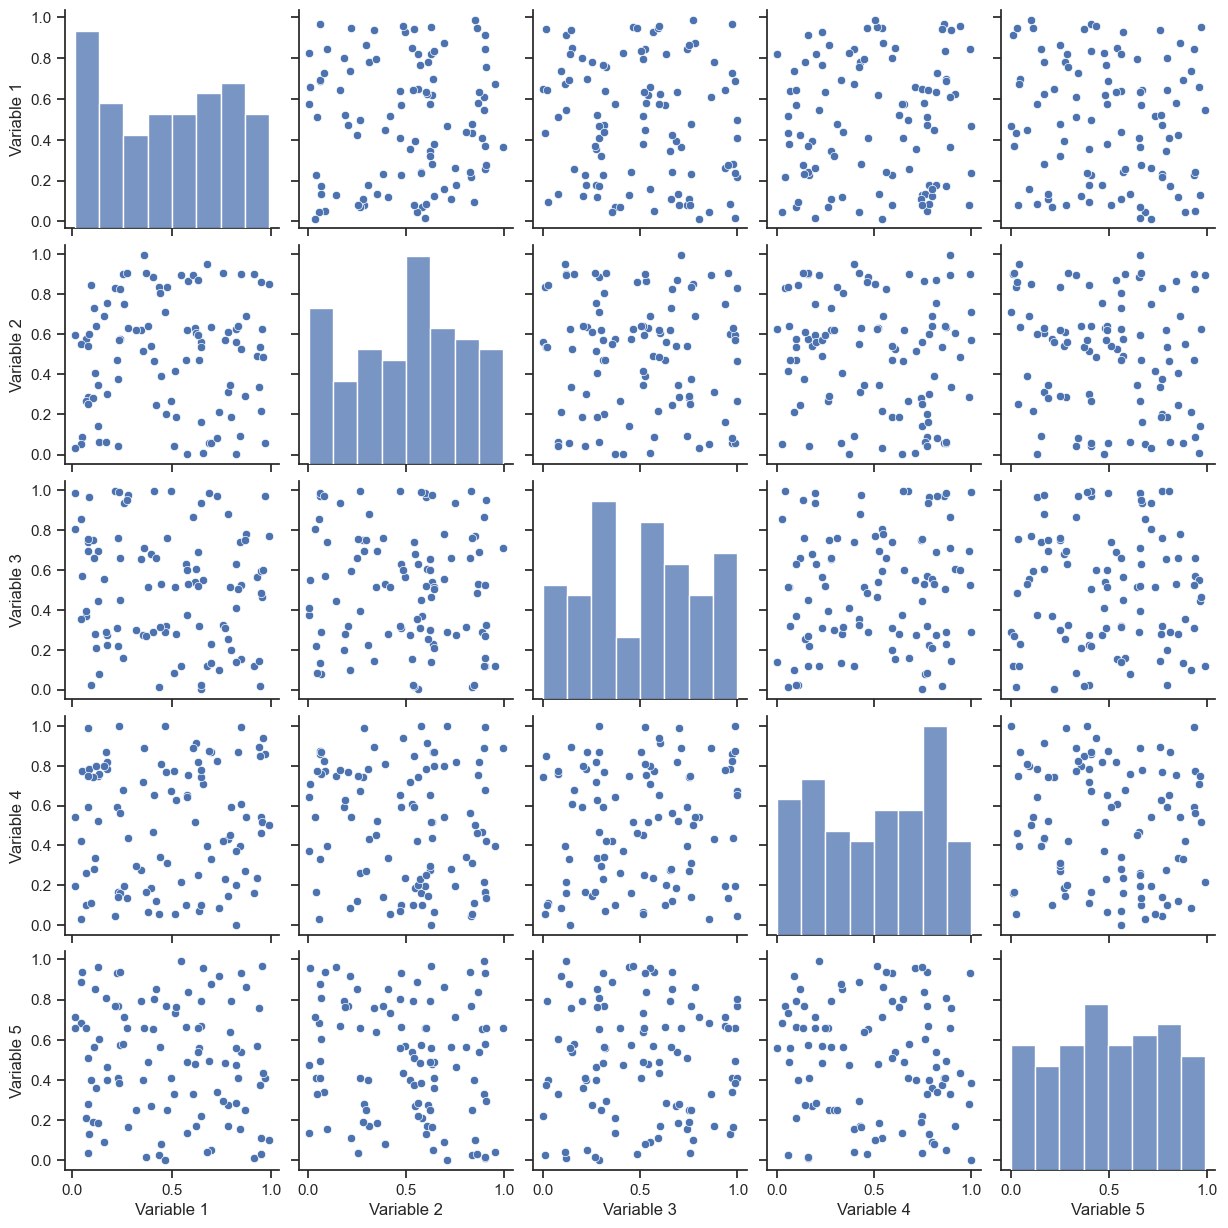

In [23]:
data=np.random.random((100,5)) # array with 100 rows and 5 columns with values btw 0 and 1
columns=['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5']
df=pd.DataFrame(data,columns=columns)

# making pair plot
sns.set_style('ticks')
sns.pairplot(df)

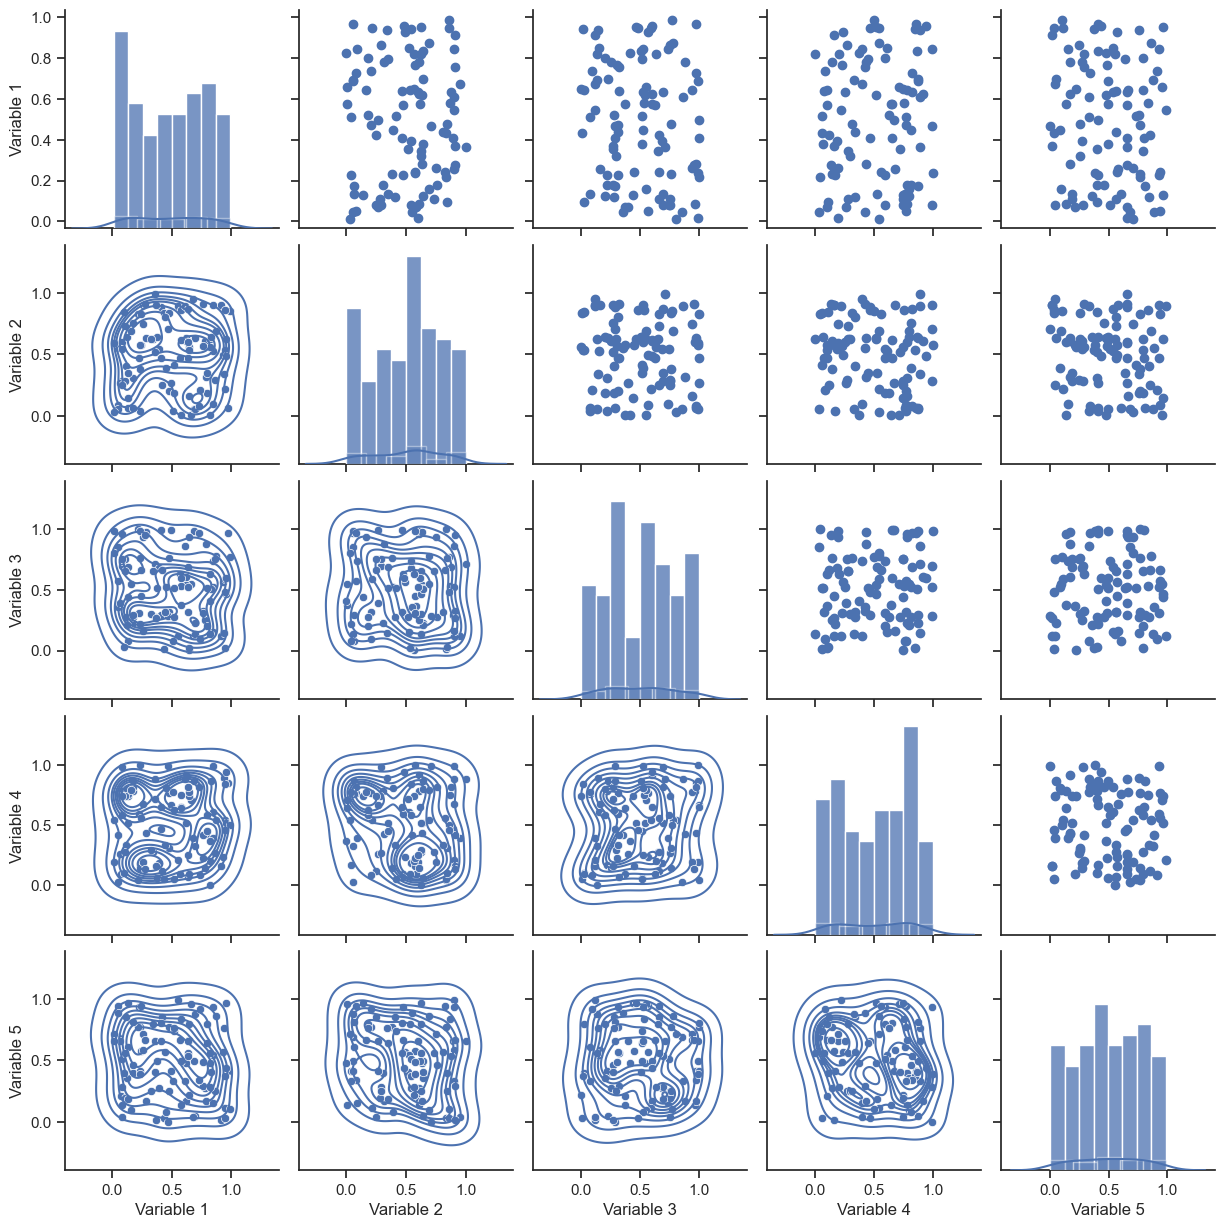

In [24]:
# customizing fraphs to be displayed
ax=sns.pairplot(df)
ax.map_upper(plt.scatter)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.distplot) 

### facet grid

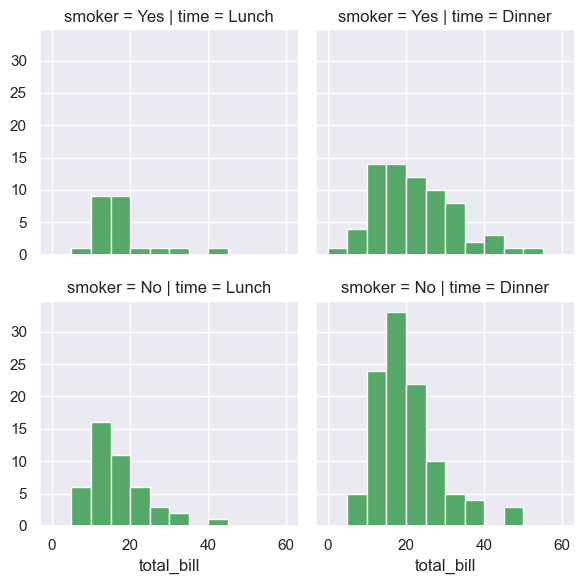

In [35]:
bins=np.arange(0,65,5)
x = sns.FacetGrid(tips, col="time",  row="smoker")
x =x.map(plt.hist, "total_bill", bins=bins, color="g")

## Color Palettes

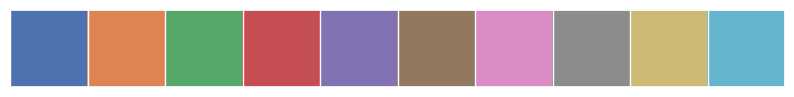

In [33]:
sns.set(rc={"figure.figsize": (2, 2)})
current_palette=sns.color_palette()
sns.palplot(current_palette)

some diffrent color palettes

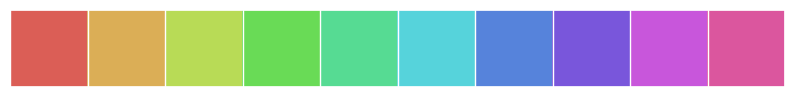

In [26]:
sns.palplot(sns.color_palette('hls',10))

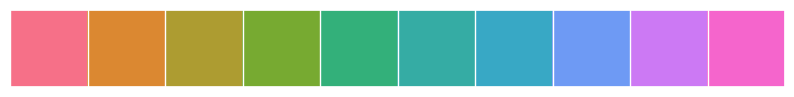

In [27]:
sns.palplot(sns.color_palette('husl',10))

cubehelix color palette

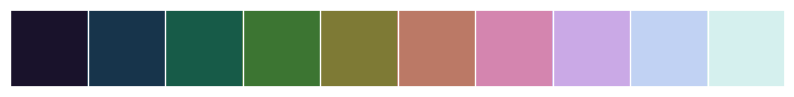

In [28]:
# default palette
sns.palplot(sns.color_palette("cubehelix", 10))

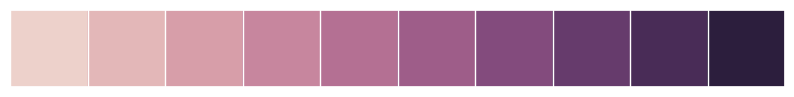

In [29]:
sns.palplot(sns.cubehelix_palette(10))

creating a density plot to showcase palette

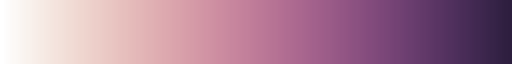

In [30]:
sample_cmap=sns.cubehelix_palette(light=1,as_cmap=True)
sample_cmap

<Axes: >

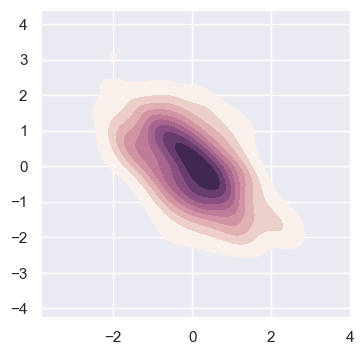

In [31]:
# kde plot represents probability distribution of a continuous variable
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
sns.kdeplot(x=x,y=y,cmap=sample_cmap,fill=True)

using color palette in swarm plot

<Axes: xlabel='day', ylabel='total_bill'>

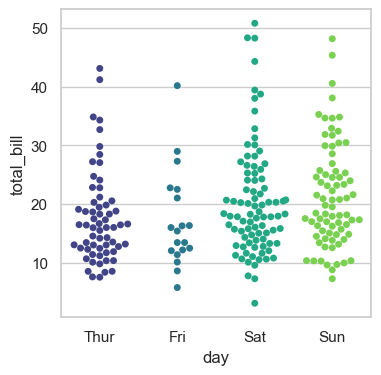

In [32]:
sns.set_style('whitegrid')
tips=sns.load_dataset('tips')
sns.swarmplot(x="day",y='total_bill',data=tips,palette='viridis')

### Heat Map
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

array([[1, 2, 3, 4],
       [2, 3, 4, 1],
       [5, 4, 2, 1],
       [6, 7, 8, 5]])

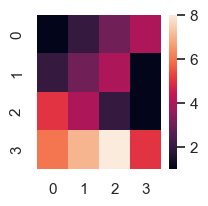

In [44]:
x = np.array([[1,2,3,4],[2,3,4,1],[5,4,2,1],[6,7,8,5]])
sns.heatmap(x)
x

<Axes: xlabel='month', ylabel='year'>

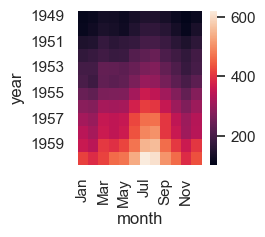

In [52]:
sns.set()
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index="year",columns='month',values="passengers",aggfunc='sum')
sns.heatmap(flights)

### Cluster Map
Plot a matrix dataset as a hierarchically-clustered heatmap.

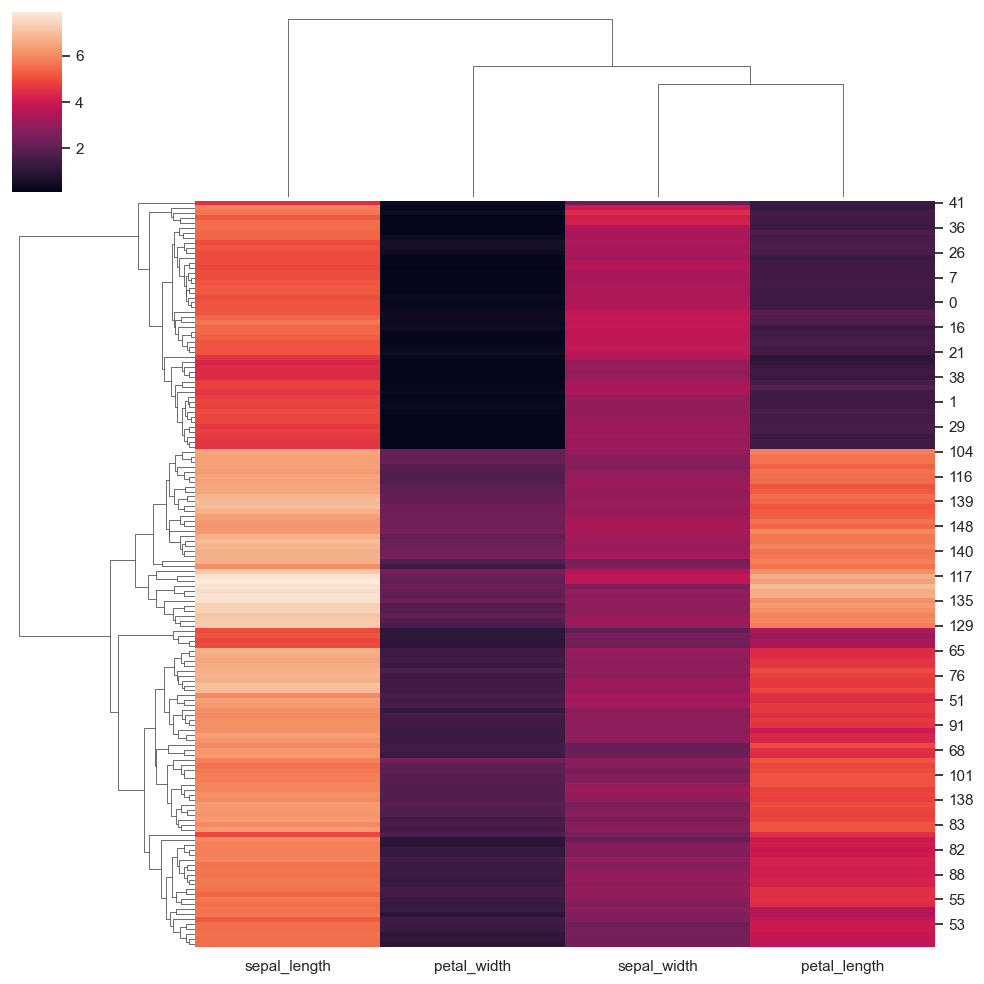

In [53]:
species = iris.pop("species")
sns.clustermap(iris)

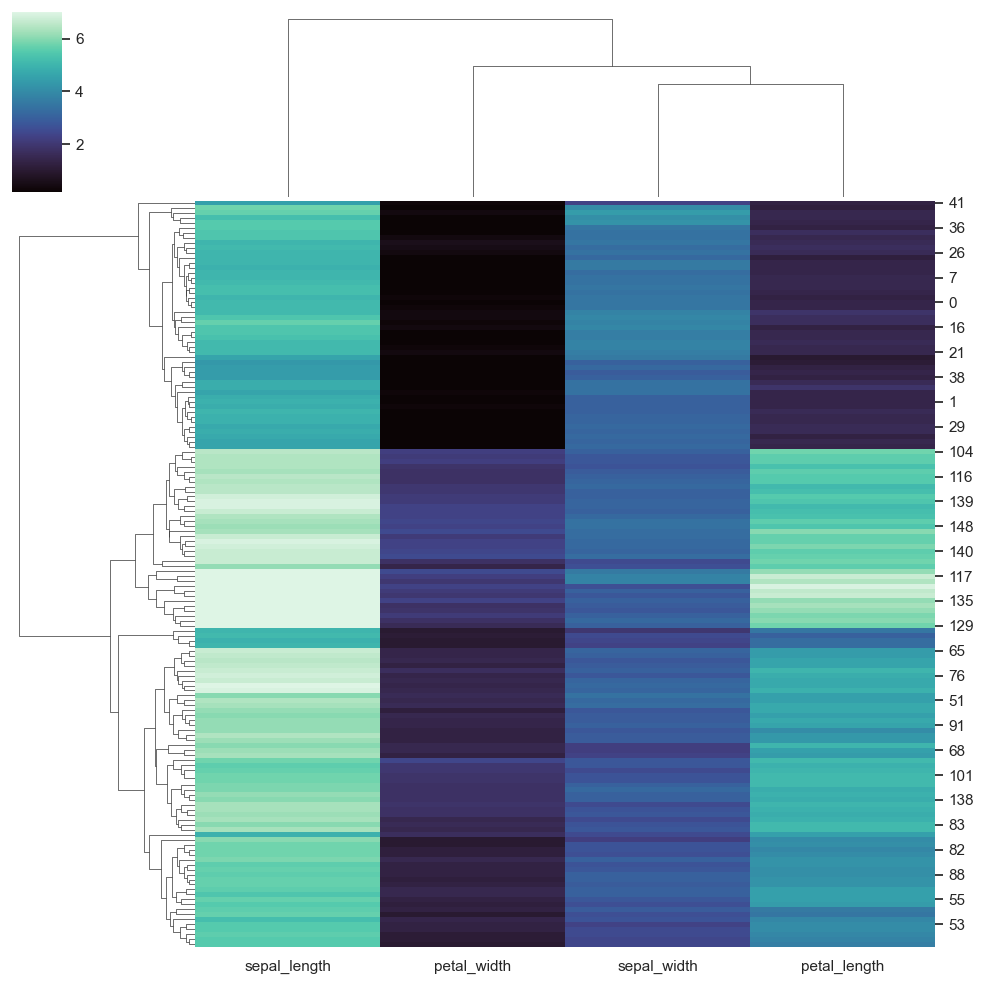

In [54]:
sns.clustermap(iris, cmap="mako", robust=True)